<a href="https://colab.research.google.com/github/Saumyen10/CNN_Implementaion/blob/main/CNN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d marquis03/cats-and-dogs

Dataset URL: https://www.kaggle.com/datasets/marquis03/cats-and-dogs
License(s): Apache 2.0
cats-and-dogs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#converting the zipfile
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-and-dogs.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/cats-and-dogs.zip' mode='r'>>

In [ ]:
#import all required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
#generators
training_ds = keras.utils.image_dataset_from_directory(

    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    #class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (256, 256),
    #shuffle = True,
 )

Found 275 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(

    directory = '/content/val',
    labels = 'inferred',
    label_mode = 'int',
    #class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (256, 256),
    #shuffle = True,
 )

Found 70 files belonging to 2 classes.


In [ ]:
#normalise the data

def norm(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

training_ds = training_ds.map(norm)         #select unique values from training dataset
validation_ds = validation_ds.map(norm)       #select unique values from training dataset

In [ ]:
#creating a CNN Model

model = Sequential()

#layers----->
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))    #convolation layer
#model.add(BatchNormalization())         #modified code
model.add(MaxPooling2D(pool_size=(2,2), strides=2))                                     #pooling layer

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())                                                    #Flatten layer

model.add(Dense(128, activation='relu'))                                #Dense layer
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
#compile the model
model.compile (optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#run the model
result = model.fit(training_ds, epochs=8, validation_data=validation_ds)

Epoch 1/8
9/9 [==============================] - 1s 84ms/step - loss: 0.5887 - accuracy: 0.6618 - val_loss: 0.6399 - val_accuracy: 0.6429
Epoch 2/8
9/9 [==============================] - 1s 83ms/step - loss: 0.4695 - accuracy: 0.7527 - val_loss: 0.6750 - val_accuracy: 0.6286
Epoch 3/8
9/9 [==============================] - 1s 83ms/step - loss: 0.3496 - accuracy: 0.8618 - val_loss: 0.7913 - val_accuracy: 0.5571
Epoch 4/8
9/9 [==============================] - 1s 82ms/step - loss: 0.2232 - accuracy: 0.9236 - val_loss: 1.1472 - val_accuracy: 0.6429
Epoch 5/8
9/9 [==============================] - 1s 82ms/step - loss: 0.1088 - accuracy: 0.9564 - val_loss: 1.2888 - val_accuracy: 0.5143
Epoch 6/8
9/9 [==============================] - 1s 82ms/step - loss: 0.0671 - accuracy: 0.9818 - val_loss: 1.8051 - val_accuracy: 0.5286
Epoch 7/8
9/9 [==============================] - 1s 81ms/step - loss: 0.0578 - accuracy: 0.9855 - val_loss: 1.4813 - val_accuracy: 0.5857
Epoch 8/8
9/9 [===================

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

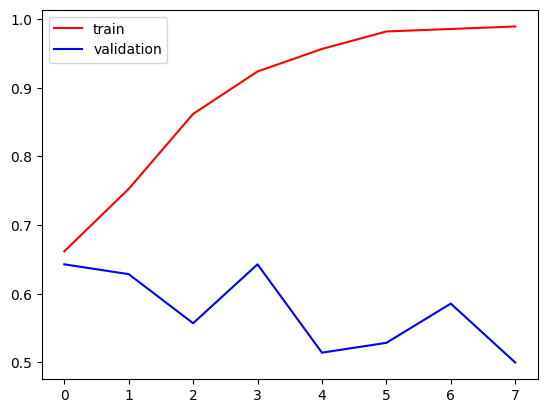

In [ ]:
#plotting Training v/s Validation Accuracy

plt.plot(result.history['accuracy'],color='red',label='train')              #history --> predefined function
plt.plot(result.history['val_accuracy'],color='blue',label='validation')

plt.legend()
plt.show()

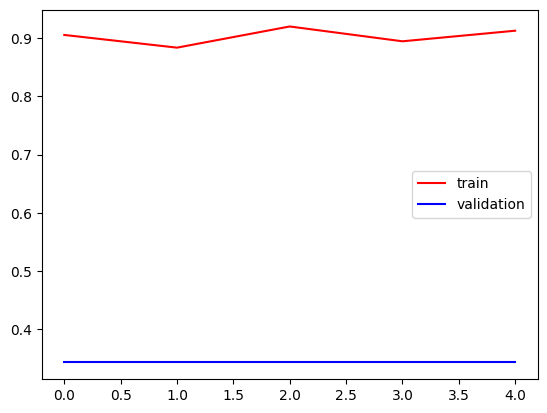

In [ ]:
#plotting Training v/s Validation Accuracy

#using BatchNormalisation, DropOut

plt.plot(result.history['accuracy'],color='red',label='train')              #history --> predefined function
plt.plot(result.history['val_accuracy'],color='blue',label='validation')

plt.legend()
plt.show()

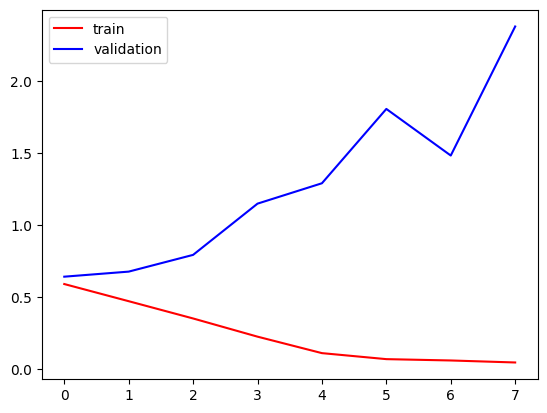

In [ ]:
#plotting Training v/s Validation Loss

plt.plot(result.history['loss'],color='red',label='train')              #history --> predefined function
plt.plot(result.history['val_loss'],color='blue',label='validation')

plt.legend()
plt.show()

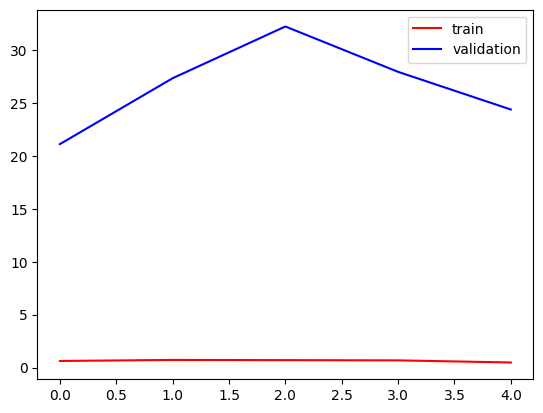

In [ ]:
#plotting Training v/s Validation Loss

#using BatchNormalisation, DropOut

plt.plot(result.history['loss'],color='red',label='train')              #history --> predefined function
plt.plot(result.history['val_loss'],color='blue',label='validation')

plt.legend()
plt.show()

In [ ]:
#The output proves the data is overfitted

#reduce Overfitting-->    1. Batch Normaliation,   2, Overfitting

#testing the model

In [ ]:
import cv2

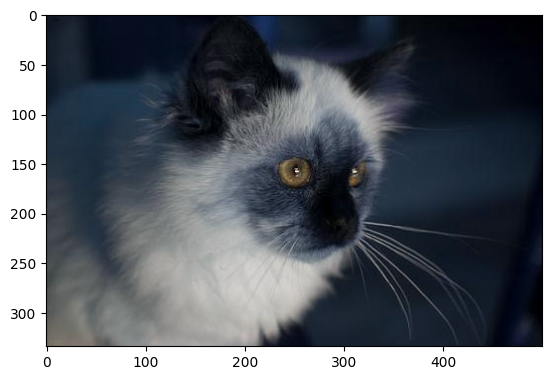

In [ ]:
#testing cat
test_img  = cv2.imread('/content/train/cat/Birman_160_jpg.rf.dc1ca8f5f9cfd2aa585a7c024074ce7f.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(334, 500, 3)

In [ ]:
#resize the img
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [ ]:
#predict result
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

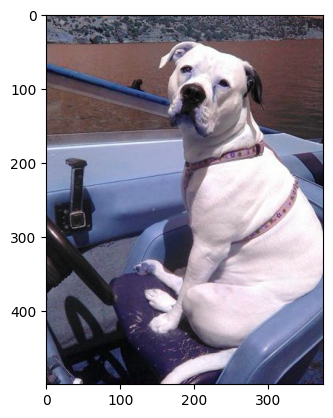

In [ ]:
#testing dog
test_img  = cv2.imread('/content/train/dog/american_bulldog_116_jpg.rf.13b4a97f7509e4805f4814cfb9ab63d4.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(500, 375, 3)

In [ ]:
#resize the img
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [ ]:
#predict result
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/train/cat/Birman_135_jpg.rf.d9cdc64e747de2078f60a4761fdc534a.jpg')


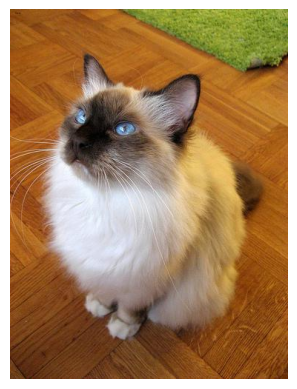

In [ ]:
plt.imshow(img)
plt.axis('off')  # optional: turn off axis labels
plt.show()
